In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/parkinsons.data')
df.head(
)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.isnull().sum().sort_values()

name                0
spread2             0
spread1             0
DFA                 0
RPDE                0
status              0
HNR                 0
NHR                 0
Shimmer:DDA         0
MDVP:APQ            0
Shimmer:APQ5        0
Shimmer:APQ3        0
MDVP:Shimmer(dB)    0
MDVP:Shimmer        0
Jitter:DDP          0
MDVP:PPQ            0
MDVP:RAP            0
MDVP:Jitter(Abs)    0
MDVP:Jitter(%)      0
MDVP:Flo(Hz)        0
MDVP:Fhi(Hz)        0
MDVP:Fo(Hz)         0
D2                  0
PPE                 0
dtype: int64

No Null Values Present 


In [ ]:
df = df.rename({'MDVP:Fo(Hz)':'fo','MDVP:Fhi(Hz)':'fhi','MDVP:Flo(Hz)':'flo','MDVP:Jitter(%)':'jitter_%','MDVP:Jitter(Abs)':'jitter_abs','MDVP:RAP':'rap','MDVP:PPQ':'ppq','Jitter:DDP':'ddp','MDVP:Shimmer':'shimmer','MDVP:Shimmer(dB)':'shimmer_dB','Shimmer:APQ3':'apq3','Shimmer:APQ5':'apq5','MDVP:APQ':'apq','Shimmer:DDA':'dda'},axis=1)

In [ ]:
df.head()

,name,fo,fhi,flo,jitter_%,jitter_abs,rap,ppq,ddp,shimmer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df = df.drop(columns='name')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fo          195 non-null    float64
 1   fhi         195 non-null    float64
 2   flo         195 non-null    float64
 3   jitter_%    195 non-null    float64
 4   jitter_abs  195 non-null    float64
 5   rap         195 non-null    float64
 6   ppq         195 non-null    float64
 7   ddp         195 non-null    float64
 8   shimmer     195 non-null    float64
 9   shimmer_dB  195 non-null    float64
 10  apq3        195 non-null    float64
 11  apq5        195 non-null    float64
 12  apq         195 non-null    float64
 13  dda         195 non-null    float64
 14  NHR         195 non-null    float64
 15  HNR         195 non-null    float64
 16  status      195 non-null    int64  
 17  RPDE        195 non-null    float64
 18  DFA         195 non-null    float64
 19  spread1     195 non-null    f

In [ ]:
features = list(df.drop(columns = 'status').columns)
outcome = ['Healthy', 'PD']
features,outcome

(['fo',
  'fhi',
  'flo',
  'jitter_%',
  'jitter_abs',
  'rap',
  'ppq',
  'ddp',
  'shimmer',
  'shimmer_dB',
  'apq3',
  'apq5',
  'apq',
  'dda',
  'NHR',
  'HNR',
  'RPDE',
  'DFA',
  'spread1',
  'spread2',
  'D2',
  'PPE'],
 ['Healthy', 'PD'])

In [ ]:
round(df.describe(),6)

,fo,fhi,flo,jitter_%,jitter_abs,rap,ppq,ddp,shimmer,shimmer_dB,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099126,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761882,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.status.value_counts(normalize =True)*100

1    75.384615
0    24.615385
Name: status, dtype: float64

Data is imbalanced


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
from pandas.core.common import random_state
strat_shuffle_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state = 45)

In [ ]:
train_idx, test_idx = next(strat_shuffle_split.split(df[features],df.status))


In [ ]:
x_train = df.loc[train_idx,features]
y_train = df.loc[train_idx,'status']

x_test = df.loc[test_idx,features]
y_test = df.loc[test_idx,'status']

In [ ]:
xy_train = pd.concat([x_train,y_train],axis=1)
xy_test = pd.concat([x_test,y_test],axis=1)
xy_train.head()

,fo,fhi,flo,jitter_%,jitter_abs,rap,ppq,ddp,shimmer,shimmer_dB,...,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
16,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,0.02047,0.192,...,0.02908,0.01859,22.333,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164,1
86,178.222,202.450,141.047,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,0.327,...,0.06219,0.03151,15.924,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614,1
75,110.707,122.611,105.007,0.00516,0.00005,0.00277,0.00289,0.00831,0.02215,0.206,...,0.03851,0.00472,25.197,0.463514,0.807217,-5.477592,0.315074,1.862092,0.228624,1
35,201.464,210.565,195.708,0.00198,0.00001,0.00105,0.00115,0.00314,0.01194,0.107,...,0.01758,0.00135,31.732,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610,0
52,128.001,138.052,122.080,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.210,...,0.03969,0.00481,24.692,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



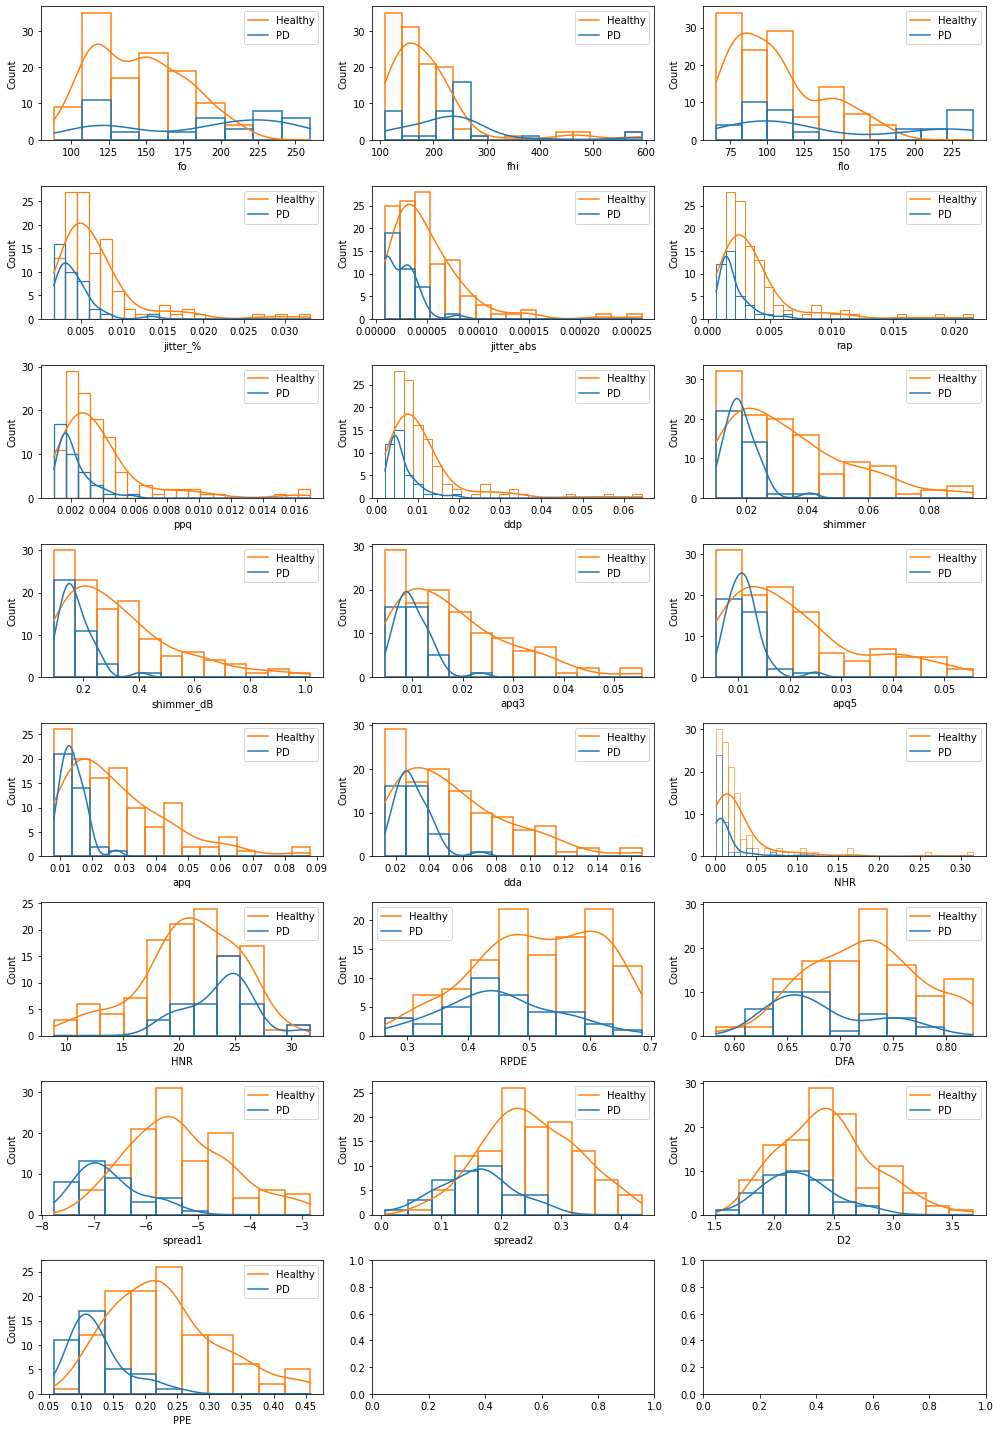

In [ ]:
def histogram_eda(df):
  fig, ax = plt.subplots(8, 3, figsize=(14, 20))
  ax = ax.flatten()
  labels = ["Healthy", "PD"]
  for ax,feature in zip(ax,features):
    ax = sns.histplot(x = feature, ax = ax, hue = 'status', kde = True, fill=False, data = df,legend = False)
    ax.legend(labels)
       
    plt.tight_layout()
            
histogram_eda(xy_train)

This shows that the data columns are mostly right skewed


Find skewness of the data

In [ ]:
from scipy import stats

In [ ]:
skew_values = xy_train[features].skew()
print(skew_values)

fo            0.630116
fhi           2.555966
flo           1.331781
jitter_%      3.028700
jitter_abs    2.757802
rap           3.389528
ppq           2.815972
ddp           3.390731
shimmer       1.350378
shimmer_dB    1.577682
apq3          1.404916
apq5          1.382350
apq           1.633416
dda           1.404926
NHR           4.263366
HNR          -0.632181
RPDE         -0.172825
DFA           0.171321
spread1       0.475209
spread2       0.135789
D2            0.569504
PPE           0.772625
dtype: float64


As most of the values are greater than 1 this confirms that the data is right skewed


In [ ]:
skew_cols = skew_values[abs(skew_values)>0.75].sort_values(ascending = False)
skew_cols_name = skew_cols.index.values
print(skew_cols_name)

['NHR' 'ddp' 'rap' 'jitter_%' 'ppq' 'jitter_abs' 'fhi' 'apq' 'shimmer_dB'
 'dda' 'apq3' 'apq5' 'shimmer' 'flo' 'PPE']


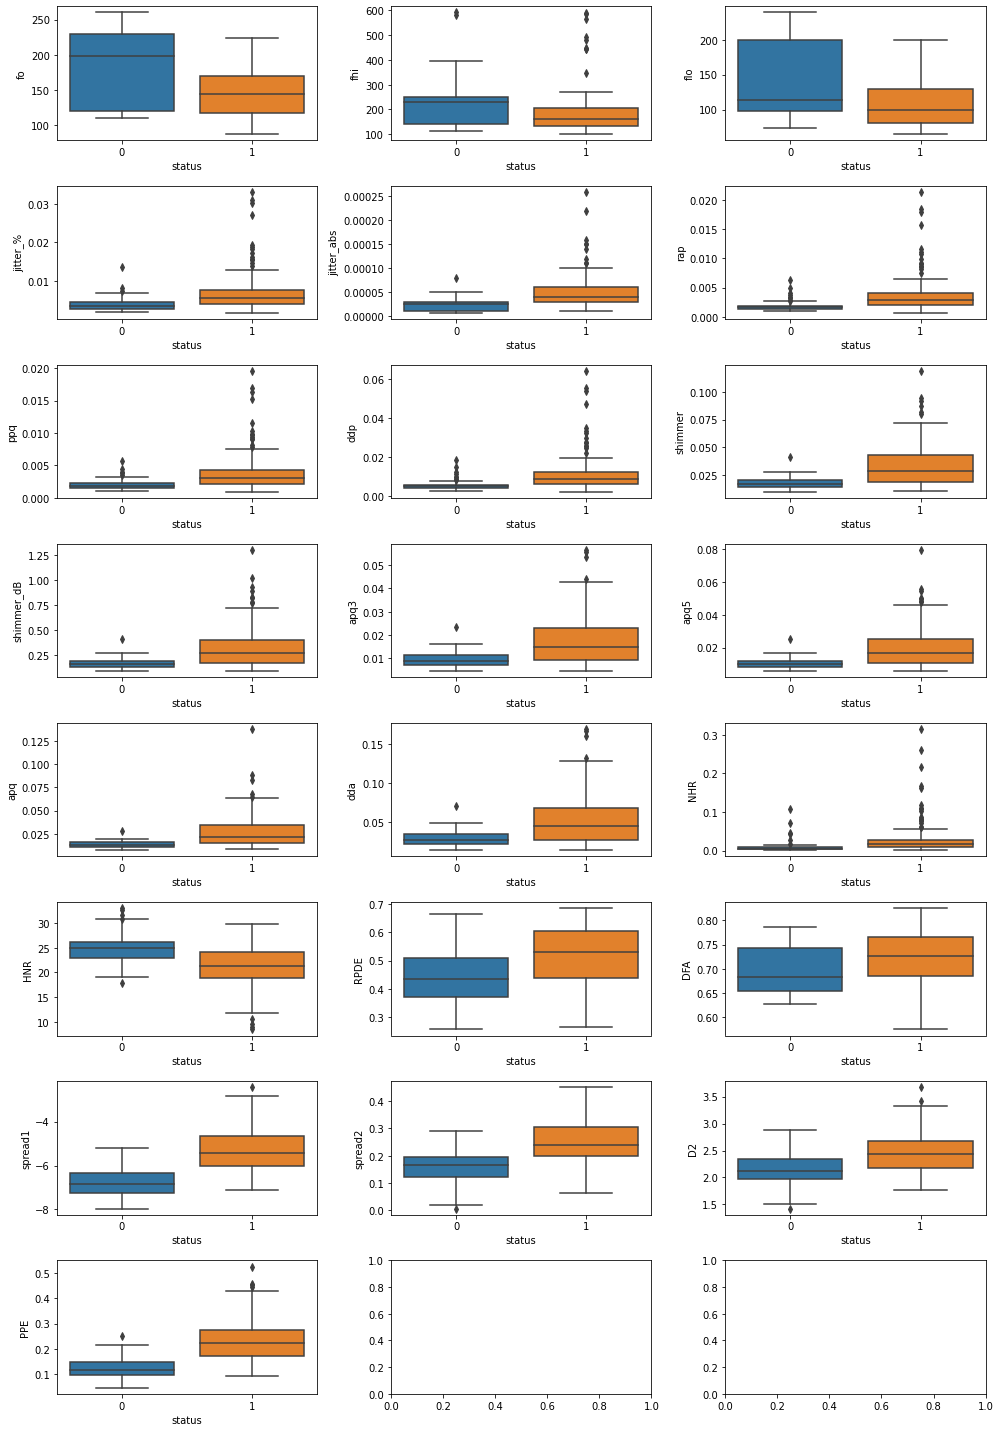

In [ ]:
def boxplot_eda(data):
  fig, ax = plt.subplots(8, 3, figsize=(14, 20))
  ax = ax.flatten()
  
  for ax,feature in zip(ax,features):
    ax = sns.boxplot(ax=ax, x='status', y=feature, data=df)
    plt.tight_layout()
            
boxplot_eda(xy_train)

This shows there are many outliers

In [ ]:
train_df0 = xy_train[features].loc[xy_train['status']==0]
train_df1 = xy_train[features].loc[xy_train['status']==1]
outlier_list0 =[]
outlier_list1 =[]
out_list_total=[]

def iqr(data):
  q25,q75 = np.percentile(data,[25,75],axis=0)
  iqr = q75 - q25
  min = q25 - 1.5*(iqr)
  max = q75 + 1.5*(iqr)
  return min,max

def outlier_list(data,out_list,feature = features):
  min,max = iqr(data)
  co = 0
  for coln in feature:
    out_list.append(len([x for x in data[coln] if x > max[co] or x < min[co]]))
    co += 1
  return out_list

outlier_df = pd.DataFrame([outlier_list(train_df0,outlier_list0), outlier_list(train_df1,outlier_list1)], 
                          columns = features, index = outcome).T

print(outlier_df) 
print(outlier_df.sum())  


            Healthy  PD
fo                0   0
fhi               3   7
flo               0   0
jitter_%          1  11
jitter_abs        1   8
rap               2  11
ppq               2  11
ddp               2  11
shimmer           1   3
shimmer_dB        1   4
apq3              1   2
apq5              1   6
apq               1   3
dda               1   2
NHR               5  14
HNR               1   2
RPDE              0   0
DFA               0   0
spread1           1   0
spread2           1   0
D2                1   2
PPE               4   3
Healthy     30
PD         100
dtype: int64


In [ ]:
lambda_box = []
for cols in skew_cols_name:
    data_box = stats.boxcox(xy_train[cols])
    xy_train[cols] = data_box[0]
    lambda_box.append(data_box[1])  
lambda_box

[-0.16116138954848713,
 -0.370620809208959,
 -0.36998213801768987,
 -0.39863274762943957,
 -0.43550520446274915,
 0.004737811988039373,
 -1.0632280221933643,
 -0.4238835824956824,
 -0.3653494776627183,
 -0.23837678882030736,
 -0.23838539657293234,
 -0.3697141500507141,
 -0.3557534750057937,
 -1.022801780184515,
 0.12303755388717208]

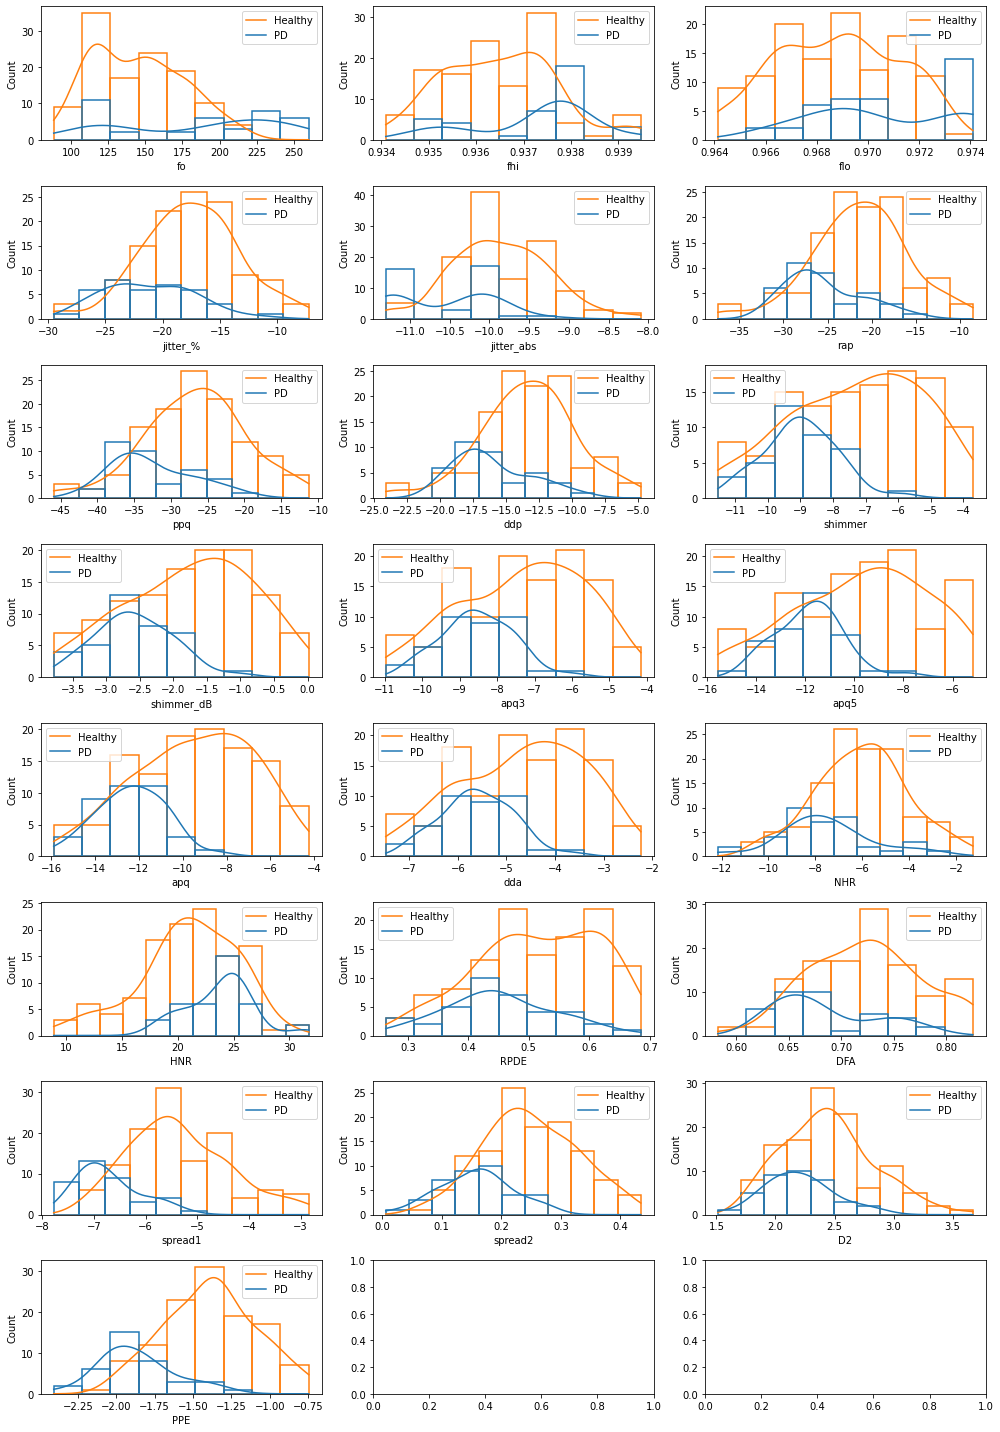

In [ ]:
histogram_eda(xy_train)

This shows us that the data is not right skewed now


In [ ]:
skew_values1 = xy_train[features].skew()
skew_cols1 = skew_values[abs(skew_values1)>0.75].sort_values(ascending = False)
skew_cols_name = skew_cols1.index.values
print(skew_cols_name)

[]


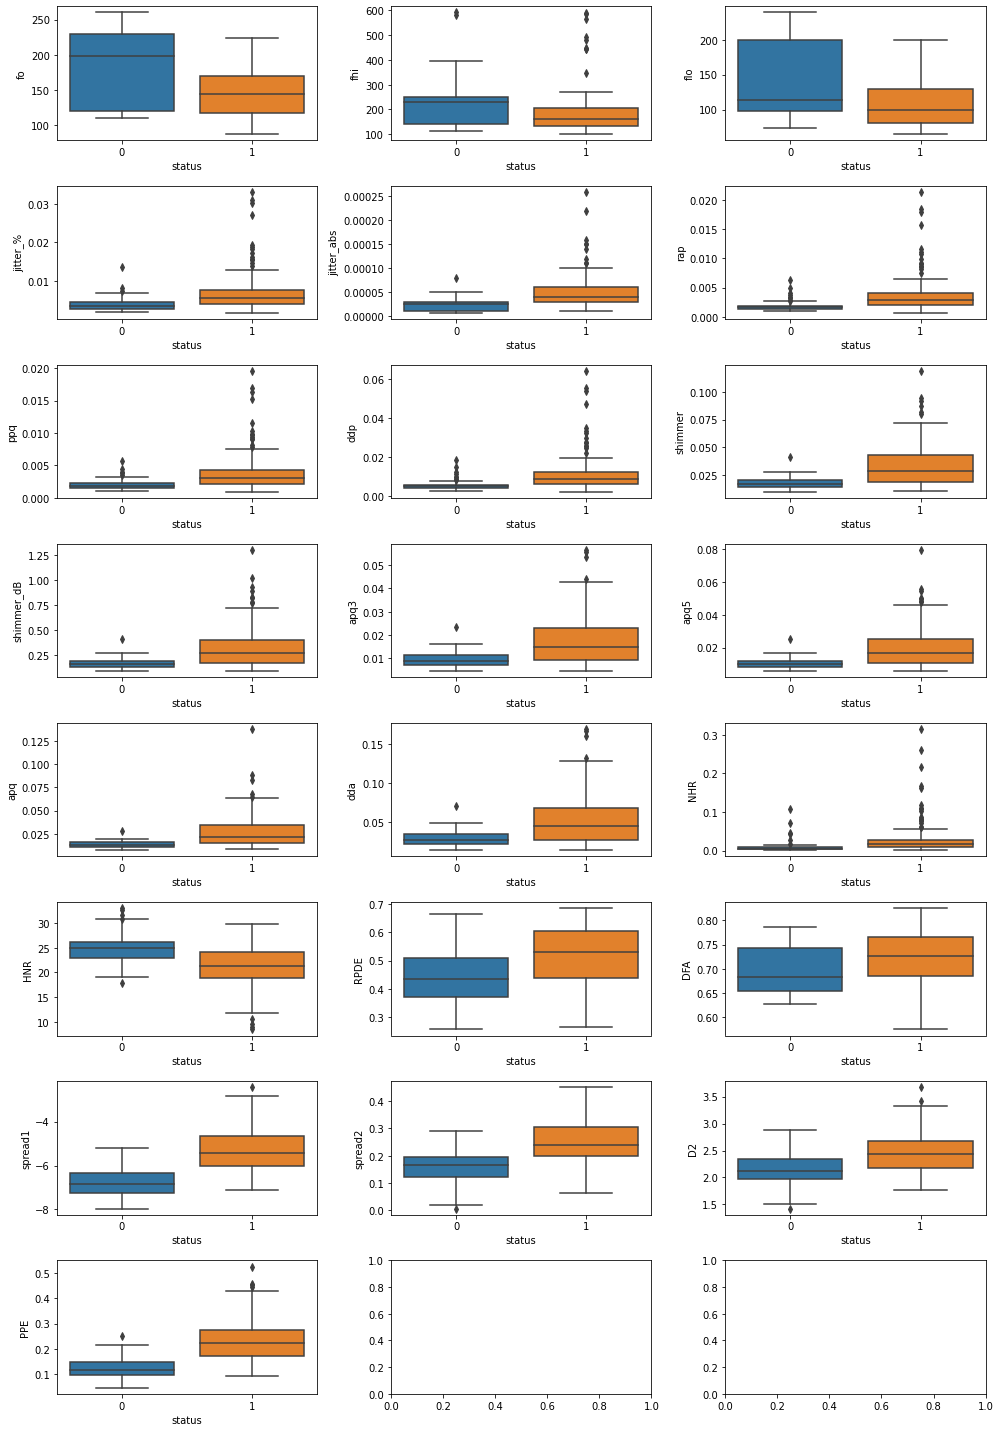

In [ ]:
boxplot_eda(xy_train)

In [ ]:
train_df0 = xy_train[features].loc[xy_train['status'] == 0]
train_df1 = xy_train[features].loc[xy_train['status'] == 1]

outlier_list0 = []
outlier_list1 = []
outlier_list_tot = []

box_df = pd.DataFrame([outlier_list(train_df0,outlier_list0), outlier_list(train_df1,outlier_list1)], columns = features, index = outcome).T

print(box_df)
print(f"\n{box_df.sum()}")

            Healthy  PD
fo                0   0
fhi               5   0
flo               0   0
jitter_%          0   3
jitter_abs        0   7
rap               0   4
ppq               0   3
ddp               0   4
shimmer           1   0
shimmer_dB        1   0
apq3              0   0
apq5              1   0
apq               0   0
dda               0   0
NHR               6   1
HNR               1   2
RPDE              0   0
DFA               0   0
spread1           1   0
spread2           1   0
D2                1   2
PPE               1   0

Healthy    19
PD         26
dtype: int64


The total outliers are reduced from 130 to 45

In [ ]:
min,max = iqr(train_df0)
train_df0.iloc[((train_df0>max )| (train_df0<min))] = np.nan
min,max = iqr(train_df1)
train_df1.iloc[((train_df1>max )| (train_df1<min))] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed ina future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed ina future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  after removing the cwd from sys.path.


In [ ]:
# Checking for outliers 

outlier_list0 = []
outlier_list1 = []

outlier_df = pd.DataFrame([outlier_list(train_df0,outlier_list0), outlier_list(train_df1,outlier_list1)], 
                          columns = features,index = outcome).T
outlier_df.sum()

Healthy    0
PD         0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imputer = IterativeImputer()
imputer.fit(train_df0)
data_imputed0 = imputer.transform(train_df0)
imputer.fit(train_df1)
data_imputed1 = imputer.transform(train_df1)
imputed_df0 = pd.DataFrame(data_imputed0, columns = features)
imputed_df1 = pd.DataFrame(data_imputed1, columns = features)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
outlier_list0 = []
outlier_list1 = []
outlier_list_tot = []

outlier_df = pd.DataFrame([outlier_list(imputed_df0,outlier_list0), outlier_list(imputed_df1,outlier_list1)], columns = features,index = outcome).T

print(outlier_df)


            Healthy  PD
fo                0   0
fhi               8   0
flo               0   0
jitter_%          0   1
jitter_abs        0   1
rap               0   1
ppq               0   0
ddp               0   1
shimmer           1   0
shimmer_dB        0   0
apq3              0   0
apq5              1   0
apq               0   0
dda               0   0
NHR               0   1
HNR               0   0
RPDE              0   0
DFA               0   0
spread1           0   0
spread2           0   0
D2                0   0
PPE               0   0


total outliers = 15

In [ ]:
imputed_df0['status'] = 0
imputed_df1['status'] = 1
imputed_df = pd.concat([imputed_df0, imputed_df1])

In [ ]:
imputed_df.head()

,fo,fhi,flo,jitter_%,jitter_abs,rap,ppq,ddp,shimmer,shimmer_dB,...,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,201.464,0.937347,0.973277,-27.487527,-11.204565,-31.489284,-41.464897,-20.145194,-10.771050,-3.455960,...,-6.797115,-9.586726,27.896082,0.344252,0.742737,-7.777685,0.170183,2.447064,-2.406797,0
1,128.001,0.935543,0.970529,-19.389454,-10.161561,-28.284306,-34.999970,-17.976089,-7.950582,-2.103708,...,-4.857657,-8.460231,24.692000,0.459766,0.766204,-7.072419,0.220434,1.972297,-1.870717,0
2,116.556,0.939471,0.967464,-18.292391,-9.887542,-21.956675,-28.226966,-13.747880,-9.268693,-2.684531,...,-5.951075,-6.144891,23.958000,0.566424,0.667654,-6.431119,0.153310,2.161936,-1.862388,0
3,117.226,0.937277,0.969466,-19.781870,-9.887542,-24.969812,-27.879776,-15.761092,-8.682772,-2.481038,...,-5.825443,-6.925636,23.079000,0.603515,0.669565,-5.619070,0.191576,2.027228,-1.397728,0
4,228.969,0.937755,0.969953,-25.366071,-11.204565,-28.368411,-37.872051,-18.032300,-9.055991,-2.684531,...,-5.620271,-8.784274,24.547000,0.305429,0.681811,-7.314237,0.111874,2.118596,-2.071334,0


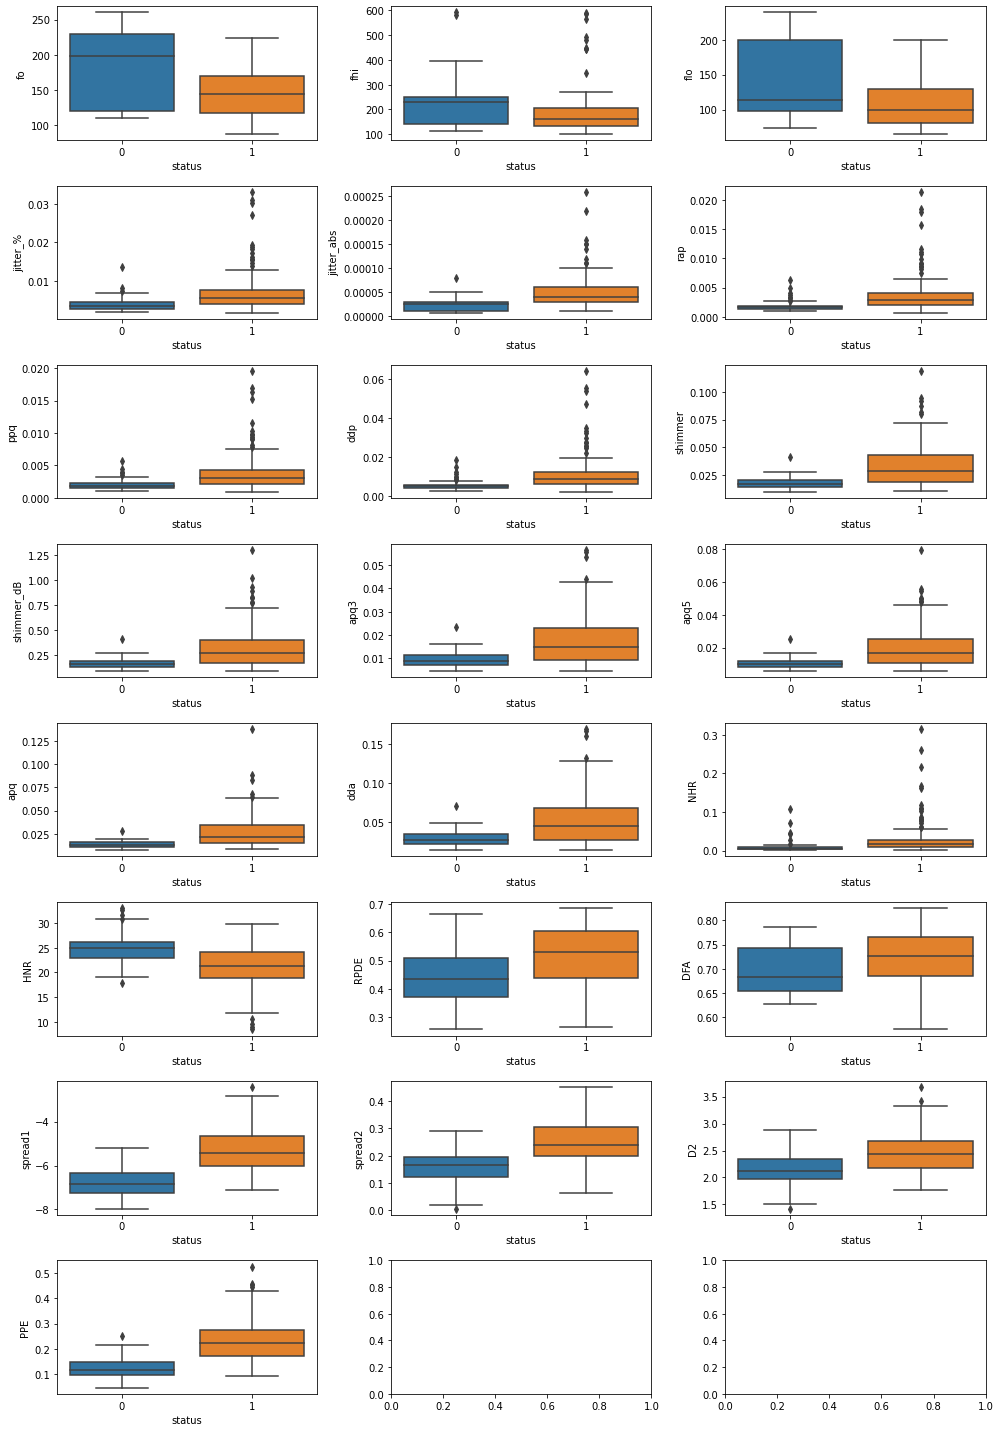

In [ ]:
boxplot_eda(imputed_df)

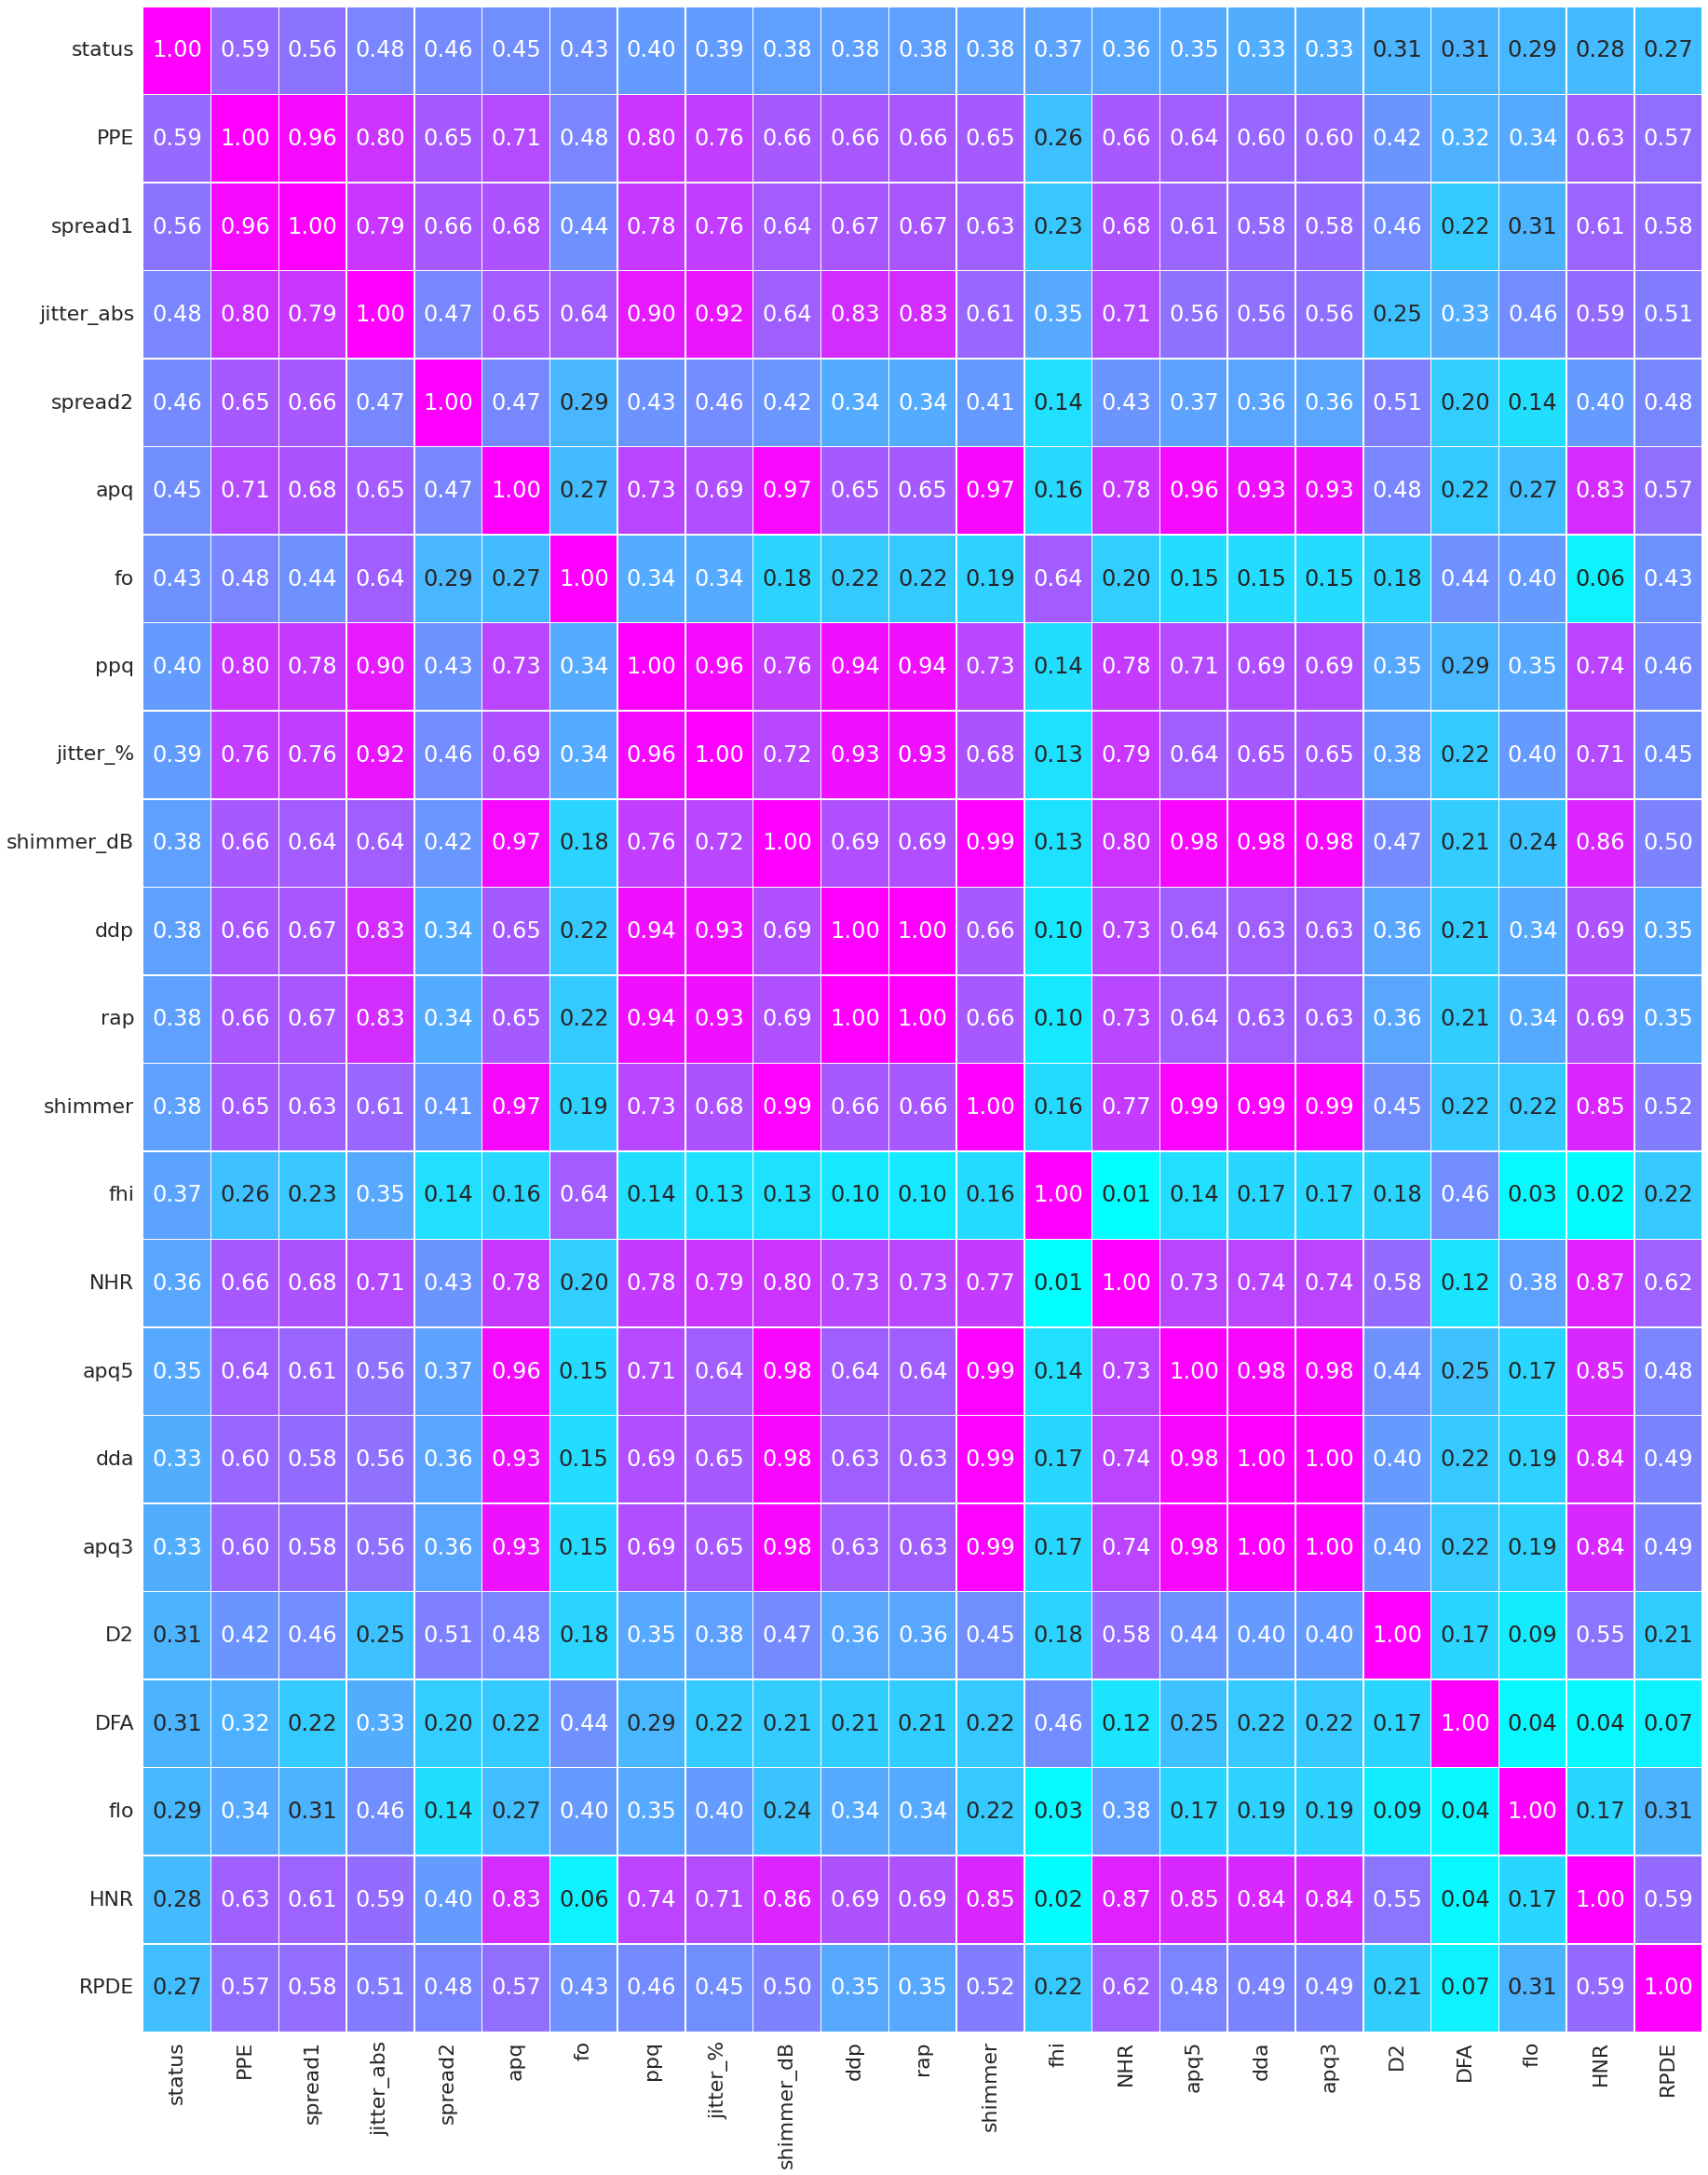

In [ ]:
plt.figure(figsize = (30, 40))
sns.set(font_scale=2)

corr_map = abs(imputed_df.corr())
corr_cols = corr_map.nlargest(24,'status')['status'].index
coff_val = np.corrcoef(imputed_df[corr_cols].values.T)
sns.heatmap(abs(coff_val), annot = True, cbar = False, linewidths=.5, cmap = plt.cm.cool,fmt='.2f', 
            xticklabels = corr_cols.values,yticklabels = corr_cols.values)
plt.show()

In [ ]:
imputed_df.drop(["HNR", "dda","apq3","rap","apq5","shimmer", "shimmer_dB","ppq","jitter_%","spread1"],
                axis = 1, inplace = True)

imputed_df.shape

(156, 13)

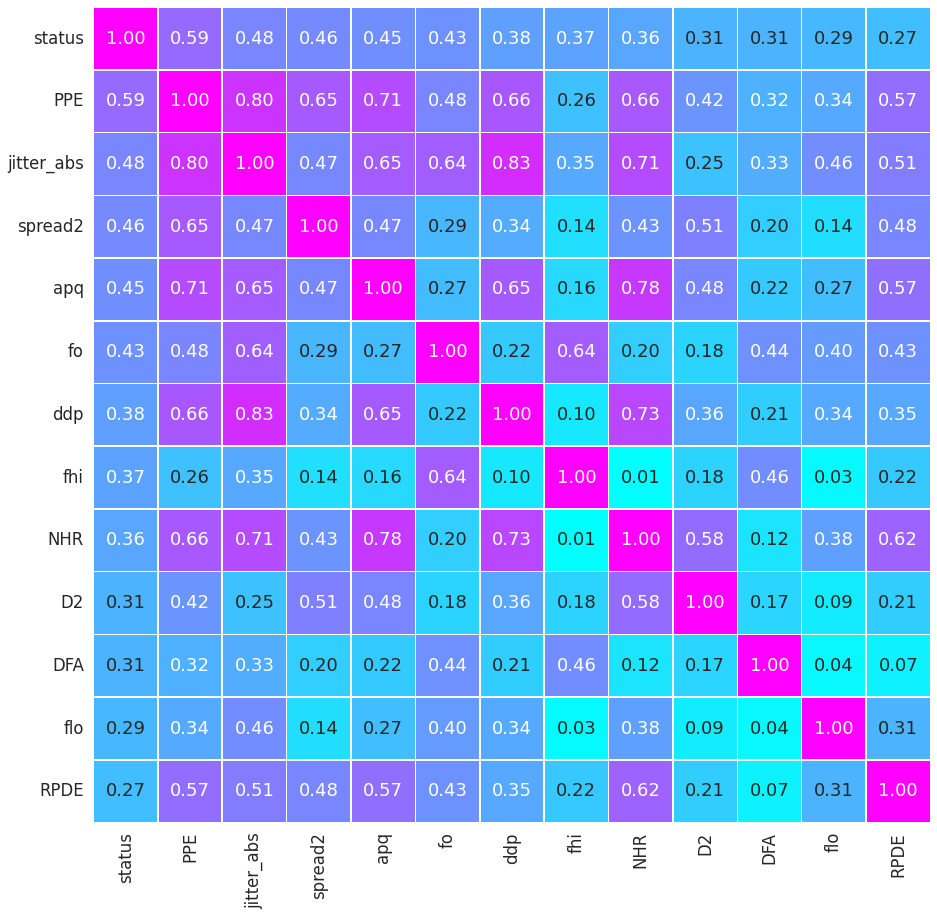

In [ ]:
plt.figure(figsize = (15, 15))
sns.set(font_scale=1.5)

# We use abs to see aximum value of correlation with status (+ or -) 
corr_map = abs(imputed_df.corr())
corr_cols = corr_map.nlargest(24,'status')['status'].index
coff_val = np.corrcoef(imputed_df[corr_cols].values.T)
sns.heatmap(abs(coff_val), annot = True, cbar = False, linewidths=.5, cmap = plt.cm.cool,fmt='.2f', 
            xticklabels = corr_cols.values,yticklabels = corr_cols.values)
plt.show()

In [ ]:
sel_features = imputed_df.columns.values

imputed_df0 = imputed_df[sel_features].loc[imputed_df['status'] == 0]
imputed_df1 = imputed_df[sel_features].loc[imputed_df['status'] == 1]
outlier_list0 = []
outlier_list1 = []

outlier_df = pd.DataFrame([outlier_list(imputed_df0,outlier_list0,sel_features),
                           outlier_list(imputed_df1,outlier_list1,sel_features)], 
                           columns = sel_features, index = outcome).T

print(outlier_df)

print(f"\nTotal Outliers: \n{outlier_df.sum()}")

            Healthy  PD
fo                0   0
fhi               8   0
flo               0   0
jitter_abs        0   1
ddp               0   1
apq               0   0
NHR               0   1
RPDE              0   0
DFA               0   0
spread2           0   0
D2                0   0
PPE               0   0
status            0   0

Total Outliers: 
Healthy    8
PD         3
dtype: int64


Boxcox for test set

In [ ]:
col = 0
for cols in skew_cols_name:
    data_box = stats.boxcox(xy_test[cols], lambda_box[col])
    xy_test[cols] = data_box
    col +=1

In [ ]:

xy_test = xy_test[sel_features]

xy_test.shape

(39, 13)

In [ ]:
outputfile_1 = 'parkinsons_train.csv'
outputfile_2 = 'parkinsons_test.csv'
imputed_df.to_csv(outputfile_1, index=False)
xy_test.to_csv(outputfile_2, index=False)

Training and predicting the model

In [ ]:
xy_train = pd.read_csv('./parkinsons_train.csv', sep=',')
xy_test= pd.read_csv('./parkinsons_test.csv', sep=',')

In [ ]:
features = list(xy_train.drop(columns = 'status').columns)
status = ["Healthy", 'PD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xy_train[features], xy_train['status'], test_size=0.25, random_state=2)

In [ ]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((117, 12), (39, 12), (117,), (39,))

In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = reg.predict(x_test)
pred.shape

(39,)

In [ ]:
score=reg.score(x_test, y_test)
print("Accuracy = ",score)

Accuracy =  0.7692307692307693


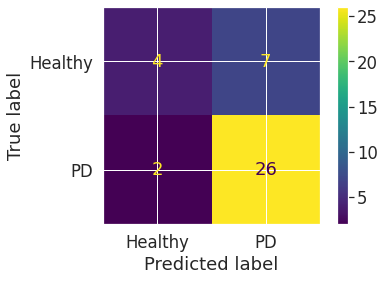

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, pred)
# print(cm)
disp = ConfusionMatrixDisplay(cm,display_labels=status)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.79      0.93      0.85        28

    accuracy                           0.77        39
   macro avg       0.73      0.65      0.66        39
weighted avg       0.75      0.77      0.74        39

